In [128]:
# import packages
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


# Load the data into a pandas dataframe
house_data = fetch_california_housing(as_frame=True)

In [83]:
# Part 1) 1)
# Access the data
data = house_data.data

# Add the target variable to the dataset
target = house_data.target
data['MedHouseVal'] = target

Shape of dataset: (20640, 9)

Column names: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Data types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Summary Statistics:              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000  

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

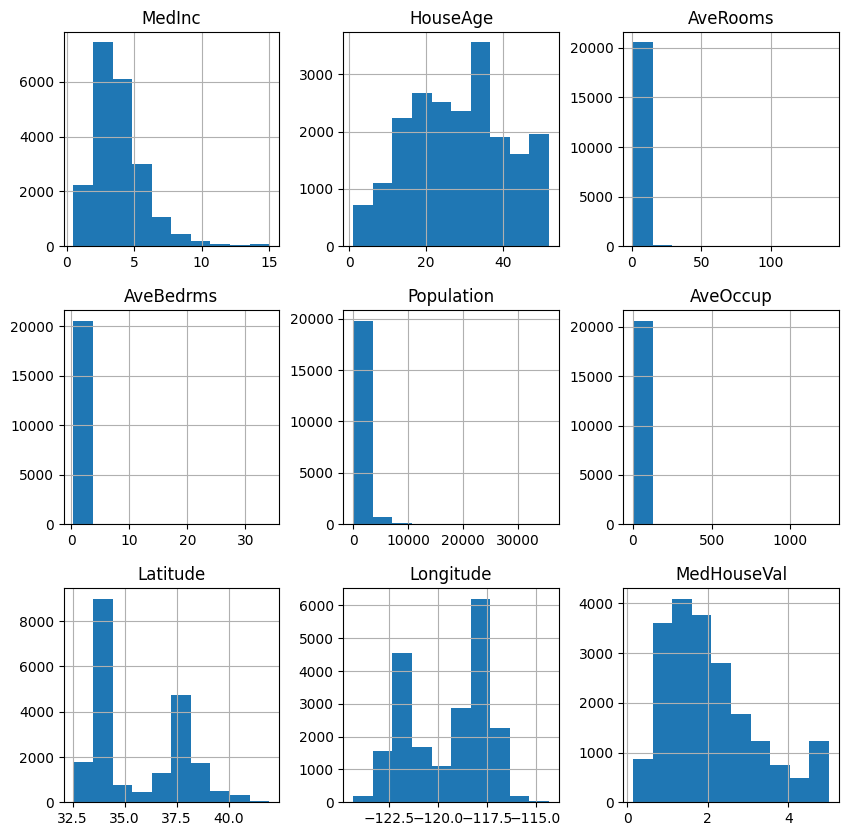

In [84]:
# Part 1) 2)
print(f"Shape of dataset: {data.shape}\n")
print(f"Column names: {data.columns}\n")
print(f"Data types:\n{data.dtypes}\n")
print(f"Summary Statistics: {data.describe()}\n") # NOTE not the same as .describe (describe() is cleaner)

data.hist(figsize=(10,10))

In [85]:
# Part 1) 3)
# check for null values in columns
print(data.isnull().sum())

# define the columns to be changed
col_mod = ["AveRooms", "AveBedrms"]

# add nan values to 0.1 of rows in specified columns
for column in col_mod:
    missing_ind = data.sample(frac=0.1, random_state = 7).index # same as set.seed() but for sklearn
    data.loc[missing_ind, column] = np.nan

# check again for null values in columns
print("\n", data.isnull().sum())

# Replace null values with the mean of column
for column in col_mod:
    mean = data[column].mean()
    data[column] = data[column].fillna(mean)

# check again for null values in columns
print("\n", data.isnull().sum())


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

 MedInc            0
HouseAge          0
AveRooms       2064
AveBedrms      2064
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64

 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [86]:
# Part 1) 4)
# initialize the scaler
scaler = sk.preprocessing.StandardScaler()

# define features
features = data.drop(columns = "MedHouseVal")

# standardize the features and replace in original data
scaled_features = scaler.fit_transform(features)
data[features.columns] = scaled_features

print(data.describe()) # mean should be aprox. 0 and sd should be aprox. 1

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   6.609700e-17  5.508083e-18  3.029446e-17 -1.170468e-16 -1.101617e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.896069e+00 -1.638332e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.708119e-01 -1.872215e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -1.827425e-02 -8.635584e-02 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.109521e-01  0.000000e+00  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.642140e+01  7.059247e+01  3.025033e+01   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  2.064000e+04  2.064000e+04  2.064000e+04  20640.000000  
mean   3.442552e-18 -1.079584e-15 -8.526513e-15      2.068558  
std    1.000024e+00  1.000024e+00  1.000024e+00      1.153956  
min   -2.290000e-01 -1.447568e+0

In [87]:
# Part 2) 1)
# define reponse variable and features
y = data["MedHouseVal"]
X = data.drop(columns = "MedHouseVal")

# Divide the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [88]:
# Part 2) 2)
# (a)
# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fit Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Fit Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# (b)
alphas = {"alpha" : [0.01, 0.1, 1, 10]}
# Lasso grid search
lasso_grid = GridSearchCV(Lasso(), alphas, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Ridge grid search
ridge_grid = GridSearchCV(Ridge(), alphas, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

print(f"Best Lasso model: {best_lasso}\nBest Ridge model: {best_ridge}")


Best Lasso model: Lasso(alpha=0.01)
Best Ridge model: Ridge(alpha=10)


In [89]:
# Part 2) 3)
# define function to calculate important performance statistics of a given model
def model_performance(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R^2: {r2:.4f}\n")

model_performance(linear_model, X_test, y_test, "Linear Regression")
model_performance(lasso_model, X_test, y_test, "Default Lasso Regression")
model_performance(ridge_model, X_test, y_test, "Default Ridge Regression")
model_performance(lasso_grid, X_test, y_test, "Tuned Lasso Regression")
model_performance(ridge_grid, X_test, y_test, "Tuned Ridge Regression")



Model: Linear Regression
Mean Squared Error: 0.5402
Mean Absolute Error: 0.5365
R^2: 0.5984

Model: Default Lasso Regression
Mean Squared Error: 1.3473
Mean Absolute Error: 0.9148
R^2: -0.0017

Model: Default Ridge Regression
Mean Squared Error: 0.5402
Mean Absolute Error: 0.5365
R^2: 0.5984

Model: Tuned Lasso Regression
Mean Squared Error: 0.5441
Mean Absolute Error: 0.5393
R^2: 0.5955

Model: Tuned Ridge Regression
Mean Squared Error: 0.5403
Mean Absolute Error: 0.5365
R^2: 0.5983



In [90]:
# Part 3) 1)
# Creates binary target variable based on the median value
median = data["MedHouseVal"].median()
data["BinaryTarget"] = (data["MedHouseVal"] > median).astype(int)

In [91]:
# Part 3) 2)
# Establish features and response variables
X = data.drop(columns = ["MedHouseVal", "BinaryTarget"])
y_bin = data["BinaryTarget"]

# Divide the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=7)

# Fit Logistic model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

Logistic Model Performance:
Accuracy: 0.8186
Precision: 0.8278
Recall: 0.8173
F1-Score: 0.8226
ROC-AUC: 0.9092



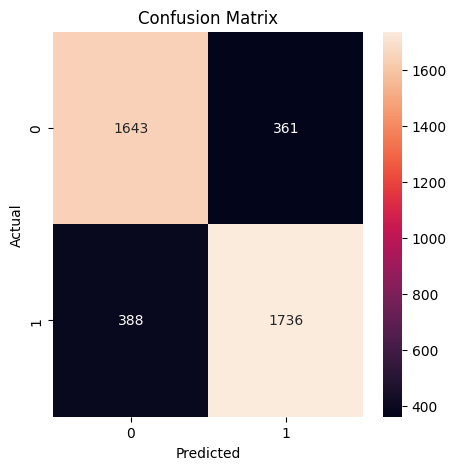

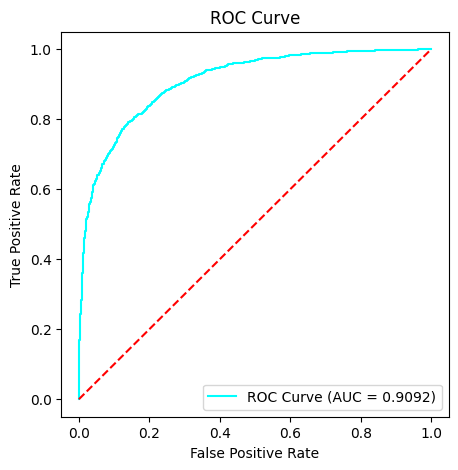

In [92]:
# Part 3) 3)
# (a)
# Predict y values
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print("Logistic Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

# (b)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="cyan", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Silhouette Score for k=3: 0.3102
Silhouette Score for k=5: 0.2539


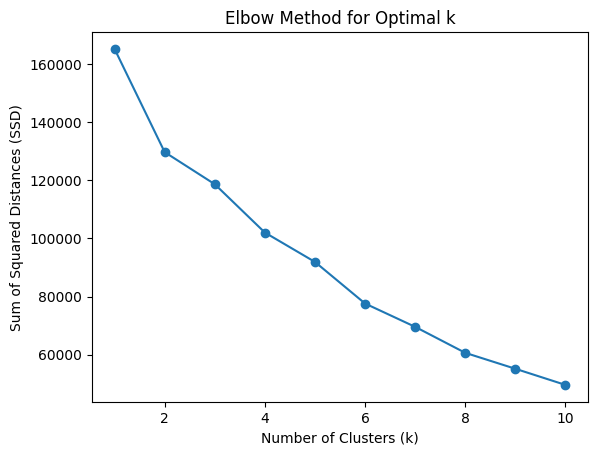

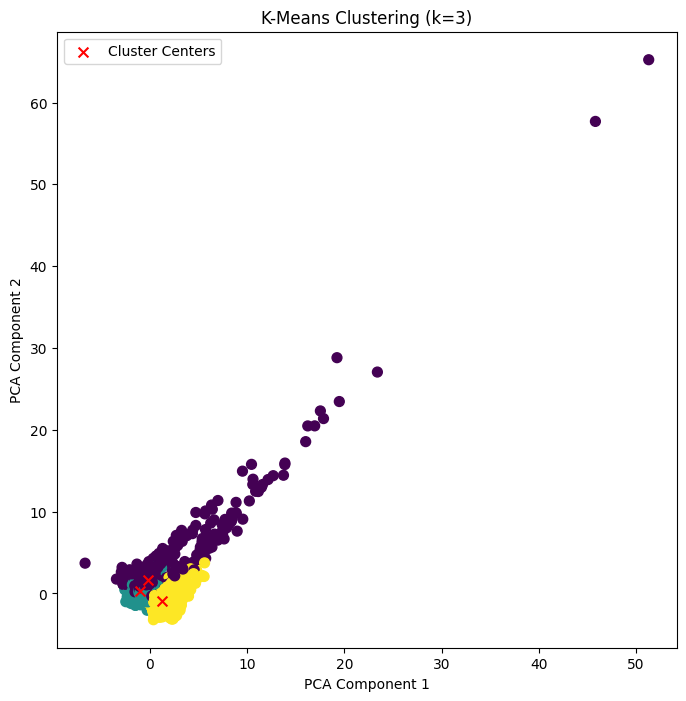

In [125]:
# Question 4) 1)
# (a)
# confirm that features has the correct variables included
features = data.drop(columns=["MedHouseVal", "BinaryTarget"])

# Sum of Squared Distances
ssd = []  
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(features)
    ssd.append(kmeans.inertia_)

# (b)
# Plot of elbow method to find optimal k value
plt.figure()
plt.plot(k_values, ssd, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")

# (c)
# Since it is better to use an odd number for k values I will test the silhouette scores of both 3 and 5 to determine the optimal k.
# I am doing this because the elbow appears to be at 4
# Fit K-Means for k=3
kmeans_3 = KMeans(n_clusters=3, random_state=7)
kmeans_3.fit(features)
silhouette_3 = silhouette_score(features, kmeans_3.labels_)
print(f"Silhouette Score for k=3: {silhouette_3:.4f}")

# Fit K-Means for k=5
kmeans_5 = KMeans(n_clusters=5, random_state=7)
kmeans_5.fit(features)
silhouette_5 = silhouette_score(features, kmeans_5.labels_)
print(f"Silhouette Score for k=5: {silhouette_5:.4f}")

# The optimal k value is 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=7)
kmeans.fit(features)

# PCA to reduce to 2 components
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
reduced_centers = pca.transform(pd.DataFrame(kmeans.cluster_centers_, columns=features.columns))

# Plot the clusters
plt.figure(figsize=(8, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, s=50)
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], c="red", marker="x", s=50, label="Cluster Centers")
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()


In [ ]:
# Question 4) 2)
# GMM Clustering for k=2
gmm = GaussianMixture(n_components=2, random_state=7)
gmm.fit(features)
gmm_silhouette = silhouette_score(features, gmm.predict(features))
print(f"GMM Silhouette Score for k=2: {gmm_silhouette:.4f}")

GMM Silhouette Score for k=2: 0.4541


In [136]:
# Question 4) 3)
# Fit K-Means for k=2
kmeans_2 = KMeans(n_clusters=2, random_state=7)
kmeans_2.fit(features)
silhouette_2 = silhouette_score(features, kmeans_2.labels_)

# Compare results
print(f"K-Means Silhouette Score for k=2: {silhouette_2:.4f}")
print(f"GMM Silhouette Score for k=2: {gmm_silhouette:.4f}")

K-Means Silhouette Score for k=2: 0.3319
GMM Silhouette Score for k=2: 0.4541


## In context of the California Housing Dataset:
The California Housing dataset contains features with varying scales, like MedInc and Population, which may not form spherical clusters. This makes GMM more suitable as it handles elliptical clusters and overlapping regions better. Even though K-means is faster and simpler, it struggles with non-spherical clusters and is more sensitive to outliers. GMM’s higher Silhouette Score (0.4541 vs. 0.3319) shows its ability to capture the dataset’s structure more effectively.